In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-05-30 00:08:56.754085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 00:08:56.754121: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 00:08:56.754858: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 00:08:56.829290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 00:08:57.771787: W tensorflow/compiler/

In [2]:
data_path = "data_files/sn_data.txt"
data = pd.read_csv(data_path)
data["date"] = pd.to_datetime(data["date"])

In [3]:
data_kp_path = "data_files/kp_data.txt"
data_kp = pd.read_csv(data_kp_path)
data_kp["datetime"] = pd.to_datetime(data_kp["datetime"])

2024-05-30 00:09:02.448503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-30 00:09:02.448640: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: 192-168-0-13
2024-05-30 00:09:02.448653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: 192-168-0-13
2024-05-30 00:09:02.448986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 555.42.2
2024-05-30 00:09:02.449085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 555.42.2
2024-05-30 00:09:02.449093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 555.42.2


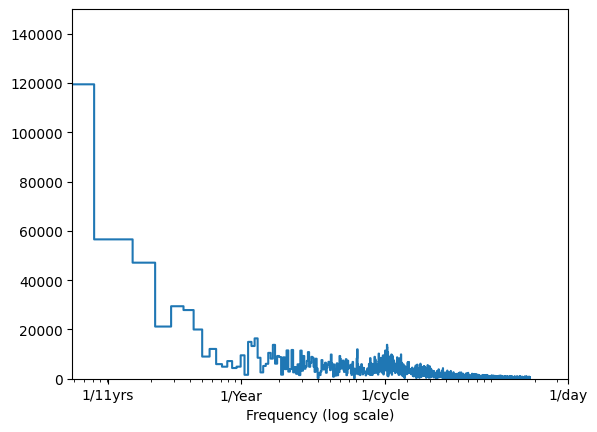

In [4]:
# Inspecting sunspot number for any periodicity
fft = tf.signal.rfft(data["SN"])
f_per_dataset = np.arange(0, len(fft))
n_samples_d = len(data)
days_per_year = 365.2524
years_per_dataset = n_samples_d/days_per_year

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
# plt.ylim(0, 100000)
# plt.xlim([0.1, max(plt.xlim())])
# 1 per 11 yrs is plotted because this is the geomagnetic cycle of the sun
# 1 per "cycle" refers to a period of around 27.2753 days (what it takes the sun to do a full rotation)
plt.xticks([1/11, 1, 365.2524 / 27.2753, 365.2524], labels=['1/11yrs','1/Year', "1/cycle",'1/day'])
plt.ylim(0, 150000)
_ = plt.xlabel('Frequency (log scale)')

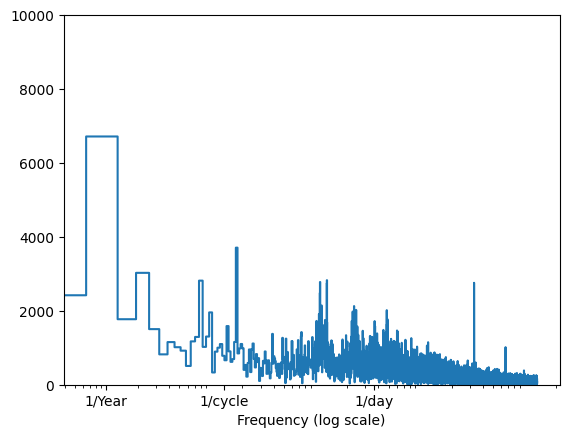

In [5]:
# Inspecting Kp-data for any periodicity
fft_kp = tf.signal.rfft(data_kp["Kp"])
f_per_dataset_kp = np.arange(0, len(fft_kp))
n_samples_h_kp = len(data_kp) / 3
hours_per_year = 24*365.2524
years_per_dataset_kp = n_samples_h_kp/hours_per_year

f_per_year_kp = f_per_dataset_kp/years_per_dataset_kp
plt.step(f_per_year_kp, np.abs(fft_kp))
plt.xscale('log')
plt.xticks([1, 365.2524 / 27.2753, 365.2524], labels=['1/Year', "1/cycle",'1/day'])
plt.ylim(0, 10000)
_ = plt.xlabel('Frequency (log scale)')